# Загрузка данных из БД FRED

Импорт библиотек

In [18]:
import numpy as np
import pandas as pd 

import pandas_datareader.data as web

# настройки визуализация
import matplotlib.pyplot as plt

## Пример 1 ВВП
Загрузим из БД [`FRED`](https://fred.stlouisfed.org/) квартальные данные по ВВП (Symbol [`GDP`](https://fred.stlouisfed.org/series/GDP)) с 1980 Q1 по 2023 Q3 и создадим датафрейм `gdp`

In [35]:
gdp = web.DataReader(name='GDP', data_source='fred', start='1980-1', end='2023-12' )
gdp

,GDP
DATE,
1980-01-01,2789.842
1980-04-01,2797.352
1980-07-01,2856.483
1980-10-01,2985.557
1981-01-01,3124.206
...,...
2022-10-01,26408.405
2023-01-01,26813.601
2023-04-01,27063.012


изменим индекс на (периодический) квартальный 

In [23]:
gdp.index = pd.period_range(start='1980Q1', end='2023Q4', freq='Q')
gdp

,GDP
1980Q1,2789.842
1980Q2,2797.352
1980Q3,2856.483
1980Q4,2985.557
1981Q1,3124.206
...,...
2022Q4,26408.405
2023Q1,26813.601
2023Q2,27063.012
2023Q3,27610.128


график ряда

<Axes: >

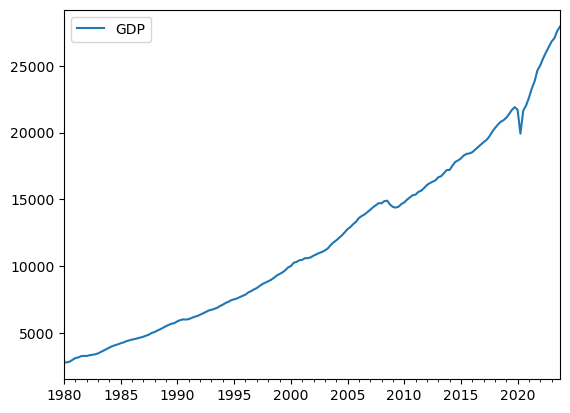

In [24]:
gdp.plot()

изменим настройки графика

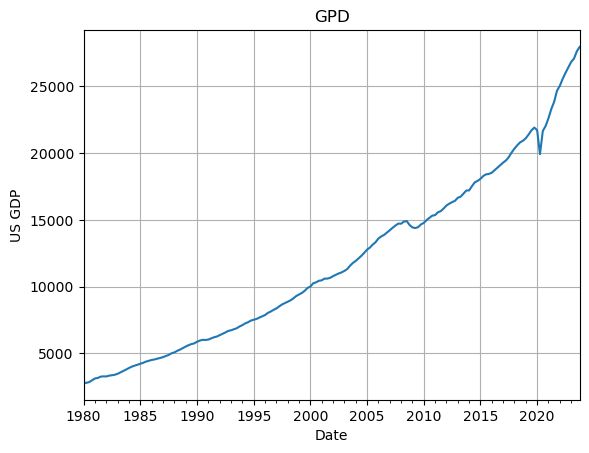

In [52]:
ax = gdp.plot(title='GPD')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US GDP')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

## Пример 2: ставки
Загрузим из БД [`FRED`](https://fred.stlouisfed.org/) месячные данные  по 

* 3-Month Treasury Bill Secondary Market Rate (Symbol [`TB3MS`](https://fred.stlouisfed.org/series/TB3MS)) 
* 1-Year Treasury Bill Secondary Market Rate (Symbol [`TB1YR`](https://fred.stlouisfed.org/series/TB1YR)) 
* Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (Symbol [`GS10`](https://fred.stlouisfed.org/series/GS10))

с 1990-01 по 2023-12 и создадим датафрейм `rates`

In [31]:
rates = web.DataReader(name=['TB3MS', 'TB1YR', 'GS10'], data_source='fred',start='1990-01', end='2023-12')
rates

,TB3MS,TB1YR,GS10
DATE,,,
1990-01-01,7.64,7.38,8.21
1990-02-01,7.74,7.55,8.47
1990-03-01,7.90,7.76,8.59
1990-04-01,7.77,7.80,8.79
1990-05-01,7.74,7.73,8.76
...,...,...,...
2023-08-01,5.30,5.09,4.17
2023-09-01,5.32,5.15,4.38
2023-10-01,5.34,5.15,4.80


зададим (периодический) месячный индекс и изменим названия переменных

In [40]:
# переопределяем индекс
rates.index = pd.period_range(start='1990-01', end='2023-12', freq='M')
# переименовываем переменные/столбцы
rates.columns = ['3M_rate', '1Y-rate', '10Y_rate']
rates

,3M_rate,1Y-rate,10Y_rate
1990-01,7.64,7.38,8.21
1990-02,7.74,7.55,8.47
1990-03,7.90,7.76,8.59
1990-04,7.77,7.80,8.79
1990-05,7.74,7.73,8.76
...,...,...,...
2023-08,5.30,5.09,4.17
2023-09,5.32,5.15,4.38
2023-10,5.34,5.15,4.80
2023-11,5.27,5.01,4.50


Визуализация (всё на одном графике)

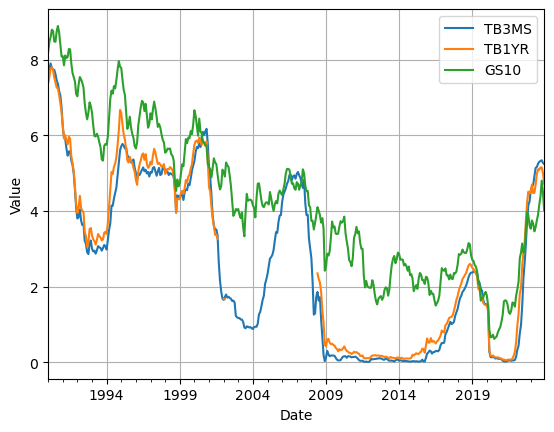

In [37]:
ax = rates.plot()

ax.set_xlabel('Date')
ax.set_ylabel('Rate (%)')
ax.grid()

plt.show()

визуализируем как отдельные графики для каждой переменной

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

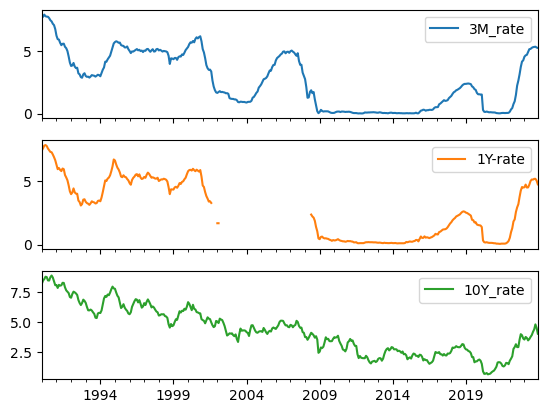

In [41]:
rates.plot(subplots=True)

изменим настройки графика

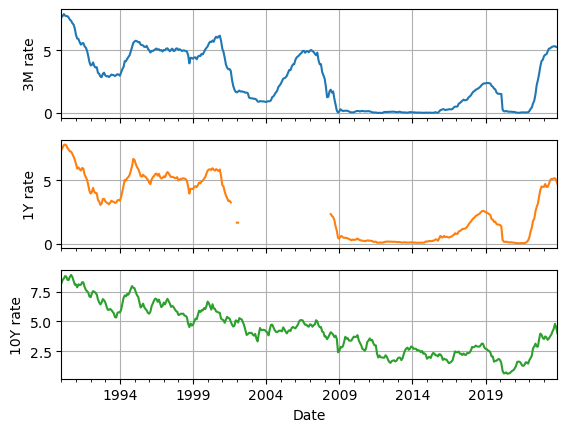

In [53]:
ax = rates.plot(subplots=True)

ax[0].set_xlabel('Date')
ax[0].set_ylabel('3M rate')
ax[0].grid()
ax[0].legend().remove()

ax[1].set_xlabel('Date')
ax[1].set_ylabel('1Y rate')
ax[1].grid()
ax[1].legend().remove()

ax[2].set_xlabel('Date')
ax[2].set_ylabel('10Y rate')
ax[2].grid()
ax[2].legend().remove()

plt.show()